In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Evitar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

#The CSV files are imported. A dictionary named 'data' is created, which contains the months in 'year-month' format as access keys and the data tables of each month as values.

file_names = ['2022_07_cleaned.csv', '2022_08_cleaned.csv', '2022_09_cleaned.csv', '2022_10_cleaned.csv', '2022_11_cleaned.csv', '2022_12_cleaned.csv', '2023_01_cleaned.csv', '2023_02_cleaned.csv', '2023_03_cleaned.csv', '2023_04_cleaned.csv', '2023_05_cleaned.csv', '2023_06_cleaned.csv']

data = {}

for file_name in file_names:
    data[file_name[:-12]] = pd.read_csv(file_name, dtype={'start_station_id': str, 'end_station_id': str})

# Import the 'Divvy_Bicycle_Stations' csv file
df_stations = pd.read_csv('Divvy_Bicycle_Stations_cleaned.csv')

# Análisis Exploratorio

### Análisis general

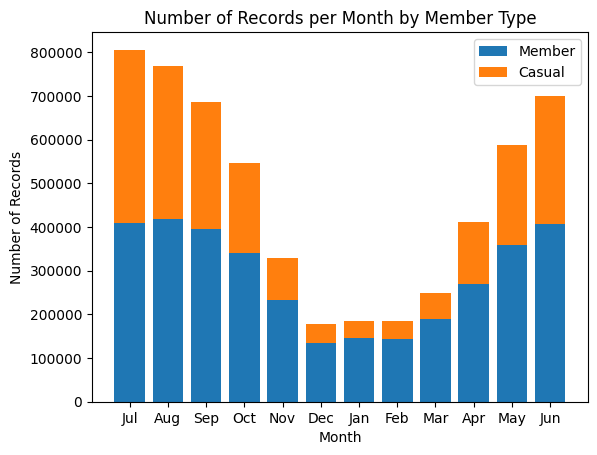

In [2]:
import matplotlib.pyplot as plt

# Create a list to store the number of records per month for each member type
member_records_per_month = []
casual_records_per_month = []

# Iterate over each element in the 'data' dictionary
for month, df in data.items():
    # Filter the dataframe for each member type
    member_df = df[df['member_casual'] == 'member']
    casual_df = df[df['member_casual'] == 'casual']
    
    # Append the number of records in the current month for each member type to the respective lists
    member_records_per_month.append(len(member_df))
    casual_records_per_month.append(len(casual_df))

# Create a bar plot to visualize the number of records per month for each member type
plt.bar(range(1, 13), member_records_per_month, label='Member')
plt.bar(range(1, 13), casual_records_per_month, bottom=member_records_per_month, label='Casual')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.title('Number of Records per Month by Member Type')
plt.legend()

# Set the x-tick labels to display the months of the year
month_labels = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
plt.xticks(range(1, 13), month_labels)

plt.show()


In [3]:
df_stations

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location,Public_Rack
0,1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.88,-87.70,"(41.877505, -87.70485)",False
1,641,Central Park Ave & Bloomingdale Ave,11,11,In Service,41.91,-87.72,"(41.914166, -87.716755)",False
2,1683527931525155814,Cornell Ave & 87th Pl,1,1,In Service,41.74,-87.58,"(41.73688127, -87.58314552)",True
3,367,Racine Ave & 35th St,15,15,In Service,41.83,-87.66,"(41.83068856472101, -87.65621066093445)",False
4,1673852313397164648,Francisco Ave & Touhy Ave,2,2,In Service,42.01,-87.70,"(42.011865, -87.701317)",True
...,...,...,...,...,...,...,...,...,...
1414,20,Sheffield Ave & Kingsbury St,15,15,In Service,41.91,-87.65,"(41.910522, -87.653106)",False
1415,54,Ogden Ave & Chicago Ave,19,19,In Service,41.90,-87.65,"(41.896362458, -87.6540612729)",False
1416,693,Baltimore Ave & 87th St,15,15,In Service,41.74,-87.55,"(41.737335600416664, -87.54851460456847)",False
1417,718,Ewing Ave & Burnham Greenway,11,11,In Service,41.71,-87.53,"(41.71274876109496, -87.53481388092041)",False


In [4]:
df_stations.sort_values('Total Docks', ascending=False)[['Station Name', 'Total Docks']].head(20)

,Station Name,Total Docks
958,Columbus Dr & Randolph St,55
1142,Shedd Aquarium,55
283,Field Museum,55
429,Streeter Dr & Grand Ave,47
970,Ravenswood Ave & Lawrence Ave,47
1092,Millennium Park,47
1136,Canal St & Adams St,47
943,Michigan Ave & 8th St,43
1023,Larrabee St & Kingsbury St,43
982,Clark St & Randolph St,43
